## EDA
Now let's see the datatypes again since most columns have been converted:

In [1]:
import numpy as np
import pandas as pd

In [2]:
telco_churn_cleaned = pd.read_csv("C:/Users/lynst/Documents/GitHub/machine-learning-projects/supervised-learning/ensemble-learning/telco_churn_cleaned.csv")
telco_churn_cleaned.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
telco_churn_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

Summarizing the measures of central tendancy again with the larger numeric dataset:

In [4]:
telco_churn_cleaned.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


### Feature Correlation
I want to ascertain if there's any correlation between any of the attributes from the very beginning.

In [5]:
telco_churn_cleaned.corr()

C:\Users\lynst\AppData\Local\Temp\ipykernel_12436\152251880.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  telco_churn_csv.corr()


,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip Code,NaN,1.000000,0.895743,-0.784271,0.001041,-0.004596,0.003346,-0.002769,-0.003562
Latitude,NaN,0.895743,1.000000,-0.876779,-0.001631,-0.019899,-0.003384,-0.007684,0.000886
Longitude,NaN,-0.784271,-0.876779,1.000000,-0.001678,0.024098,0.004594,0.004260,0.000485
Tenure Months,NaN,0.001041,-0.001631,-0.001678,1.000000,0.247900,-0.352229,-0.224987,0.396406
Monthly Charges,NaN,-0.004596,-0.019899,0.024098,0.247900,1.000000,0.193356,0.133754,0.098693
Churn Value,NaN,0.003346,-0.003384,0.004594,-0.352229,0.193356,1.000000,0.664897,-0.127463
Churn Score,NaN,-0.002769,-0.007684,0.004260,-0.224987,0.133754,0.664897,1.000000,-0.079782
CLTV,NaN,-0.003562,0.000886,0.000485,0.396406,0.098693,-0.127463,-0.079782,1.000000


## Visualizing the Data

A visual summary of the dispersion of data about its mean using matplotlib.

array([[<Axes: title={'center': 'Count'}>,
        <Axes: title={'center': 'Zip Code'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Tenure Months'}>,
        <Axes: title={'center': 'Monthly Charges'}>],
       [<Axes: title={'center': 'Churn Value'}>,
        <Axes: title={'center': 'Churn Score'}>,
        <Axes: title={'center': 'CLTV'}>]], dtype=object)

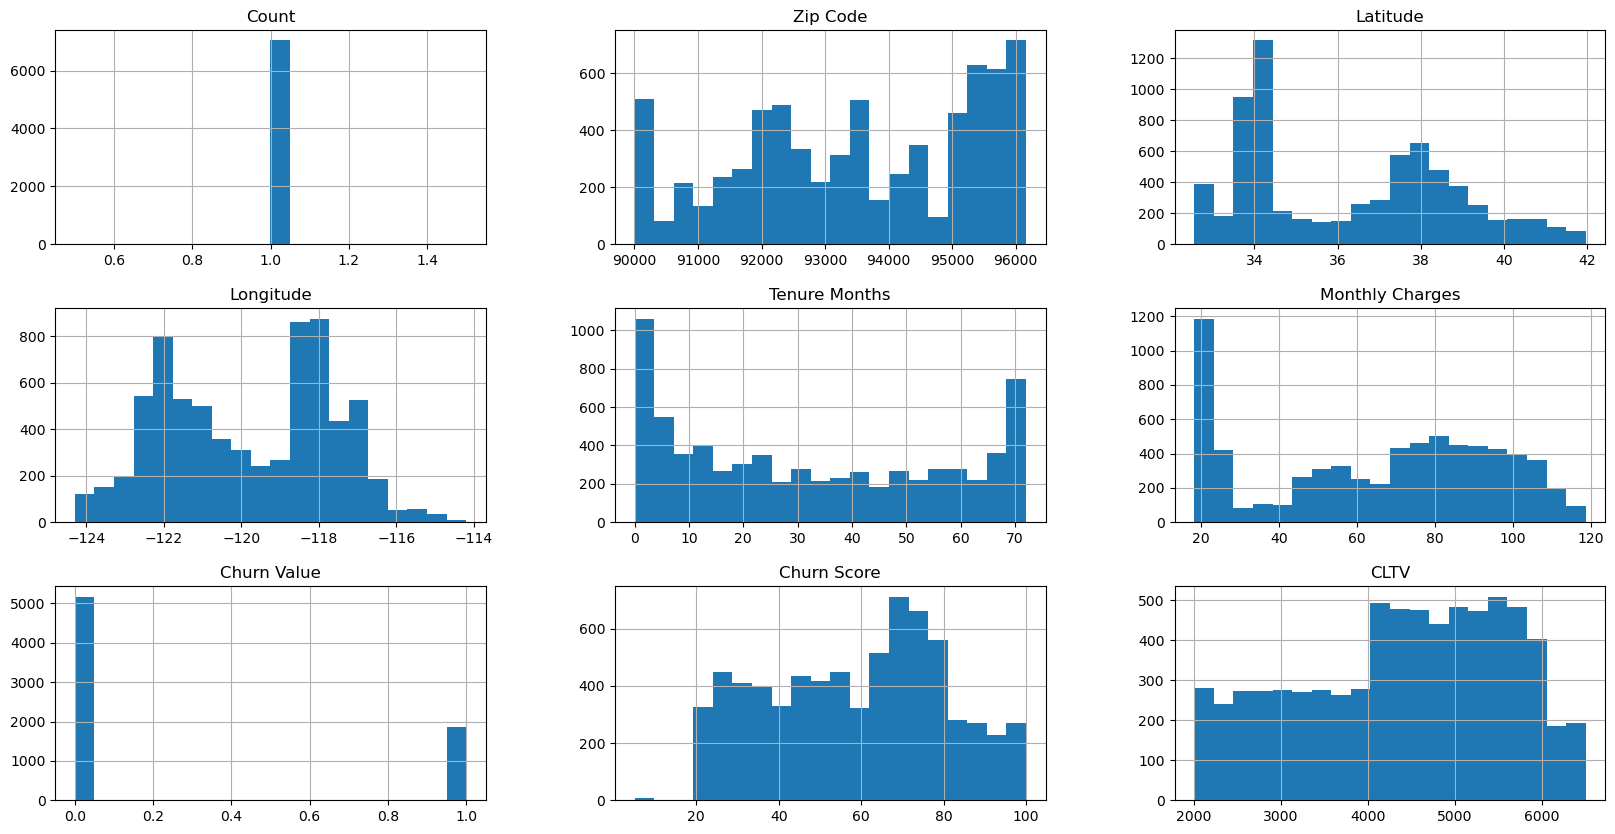

In [6]:
telco_churn_cleaned.hist(bins=20, figsize=(20,10))

This provides a histogram splitting the data into separate buckets, or intervals, then counting the frequency distribution within them. It also provides a nice display of the dispersion of data, but now I want to see how it's distributed around the average values and the degree to which it's distributed around the average (fat, thin, or bell-shaped).

Something that stands out immediately are those graphs which have Boolean data which I have converted to binary outcomes because they have only two obvious output values.